<a href="https://colab.research.google.com/github/martuballestrasse/MyFiles/blob/main/3Datasets/TelcoCustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Visualizaciones en Python
## Primera Entrega

##Abstract
En este proyecto trabajamos con el dataset Telco Customer Churn proveniente de Kaggle, que reúne información de más de 7.000 clientes de una compañía de telecomunicaciones. La base de datos incluye datos demográficos, tipo de servicios contratados (telefonía, internet, líneas adicionales, etc.), modalidades de pago, cargos mensuales y totales, junto con la variable de interés que indica si un cliente permaneció o canceló el servicio (churn).

El objetivo principal es aplicar técnicas de visualización y análisis exploratorio de datos para identificar patrones relevantes, relaciones entre variables y posibles factores que influyen en la decisión de los clientes de continuar o abandonar el servicio. Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, apoyadas en herramientas como pandas, Matplotlib y Seaborn.

En esta primera entrega seguiremos las siguientes etapas: limpieza de datos y descripción inicial del set de datos, identificación de preguntas claves y construcción de respuestas mediante herramientas gráficas, conclusiones preliminares y preparación para futuros modelos predictivos.

##Preguntas / Hipótesis de interés



1. Según la muestra de datos actual, cual es la probabilidad de que un cliente abandone la compañia?
2. ¿Qué factores parecen influir más en la tasa de abandono de clientes?
3. ¿Los servicios extra ofrecidos están ayudando a la fidelización de clientes?
4. ¿Como impacta el valor de la cuota mensual en la tasa de abandono?


##Descripcion de campos
| Campo                | Significado                                                                                                  |
| -------------------- | ------------------------------------------------------------------------------------------------------------ |
| **customerID**       | Identificador único del cliente.                                                                             |
| **gender**           | Género del cliente (Male/Female).                                                                            |
| **SeniorCitizen**    | Si el cliente es adulto mayor (1) o no (0).                                                                  |
| **Partner**          | Si el cliente tiene pareja (“Yes” / “No”).                                                                   |
| **Dependents**       | Si tiene dependientes (familiares a su cargo).                                                               |
| **tenure**           | Cuántos meses lleva como cliente (tiempo utilizando el servicio).                                            |
| **PhoneService**     | Si tiene servicio telefónico (“Yes” / “No”).                                                                 |
| **MultipleLines**    | Si tiene más de una línea telefónica (“Yes” / “No” / “No phone service”).                                    |
| **InternetService**  | Tipo de servicio de internet (“DSL”, “Fiber optic”, “No”).                                                   |
| **OnlineSecurity**   | Si tiene seguridad en línea (“Yes” / “No” / “No internet service”).                                          |
| **OnlineBackup**     | Si tiene respaldo en línea (“Yes” / “No” / “No internet service”).                                           |
| **DeviceProtection** | Si tiene protección de dispositivos (“Yes” / “No” / “No internet service”).                                  |
| **TechSupport**      | Si tiene soporte técnico (“Yes” / “No” / “No internet service”).                                             |
| **StreamingTV**      | Si tiene streaming de TV (“Yes” / “No” / “No internet service”).                                             |
| **StreamingMovies**  | Si tiene streaming de películas (“Yes” / “No” / “No internet service”).                                      |
| **Contract**         | Tipo de contrato (“Month-to-month”, “One year”, “Two year”).                                                 |
| **PaperlessBilling** | Si tiene facturación digital (“Yes” / “No”).                                                                 |
| **PaymentMethod**    | Método de pago (“Electronic check”, “Mailed check”, “Bank transfer (automatic)”, “Credit card (automatic)”). |
| **MonthlyCharges**   | Cuánto paga por mes.                                                                                         |
| **TotalCharges**     | Total acumulado que ha pagado — puede haber espacios vacíos/valores faltantes si tenure es 0.                |
| **Churn**            | Variable objetivo: si el cliente se fue (“Yes”) o no (“No”).                                                 |


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Load and Understand data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/martuballestrasse/MyFiles/refs/heads/main/3Datasets/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Cleaning & Basic Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Replace blank spaces in 'TotalCharges' with NaN and convert to float

df.TotalCharges = df.TotalCharges.replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


👉 Se observa que hay valores faltantes en la columna 'Total Charges', en principio las eliminamos por ser una cantidad depreciable frente al total.

In [10]:
# Drop rows with missing values
df = df.dropna()

#Get statistics measures
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Análisis Univariado - Churn Rate Overview

In [11]:
churn_counts = df.Churn.value_counts()
churn_perc = df.Churn.value_counts(normalize = True) * 100

print("Churn counts are: \n",churn_counts)
print("Churn percentage are: \n", churn_perc)

Churn counts are: 
 Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn percentage are: 
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


👉 **Pregunta 1.** 26% de los clientes han abandonado.

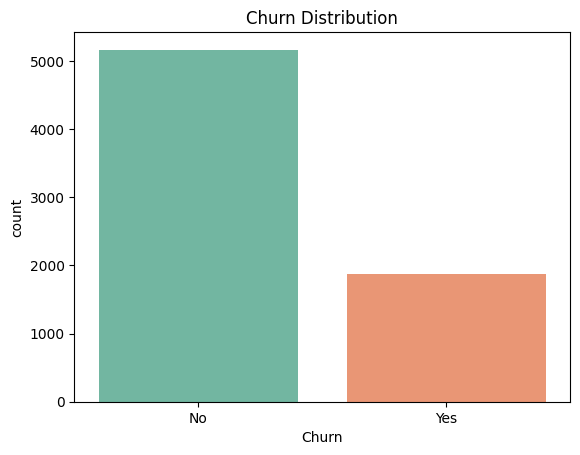

In [12]:
sns.countplot(x='Churn', data=df, hue='Churn', palette='Set2')
plt.title("Churn Distribution")
plt.show()


## Análisis Bivariado
Churn by Categorical Features

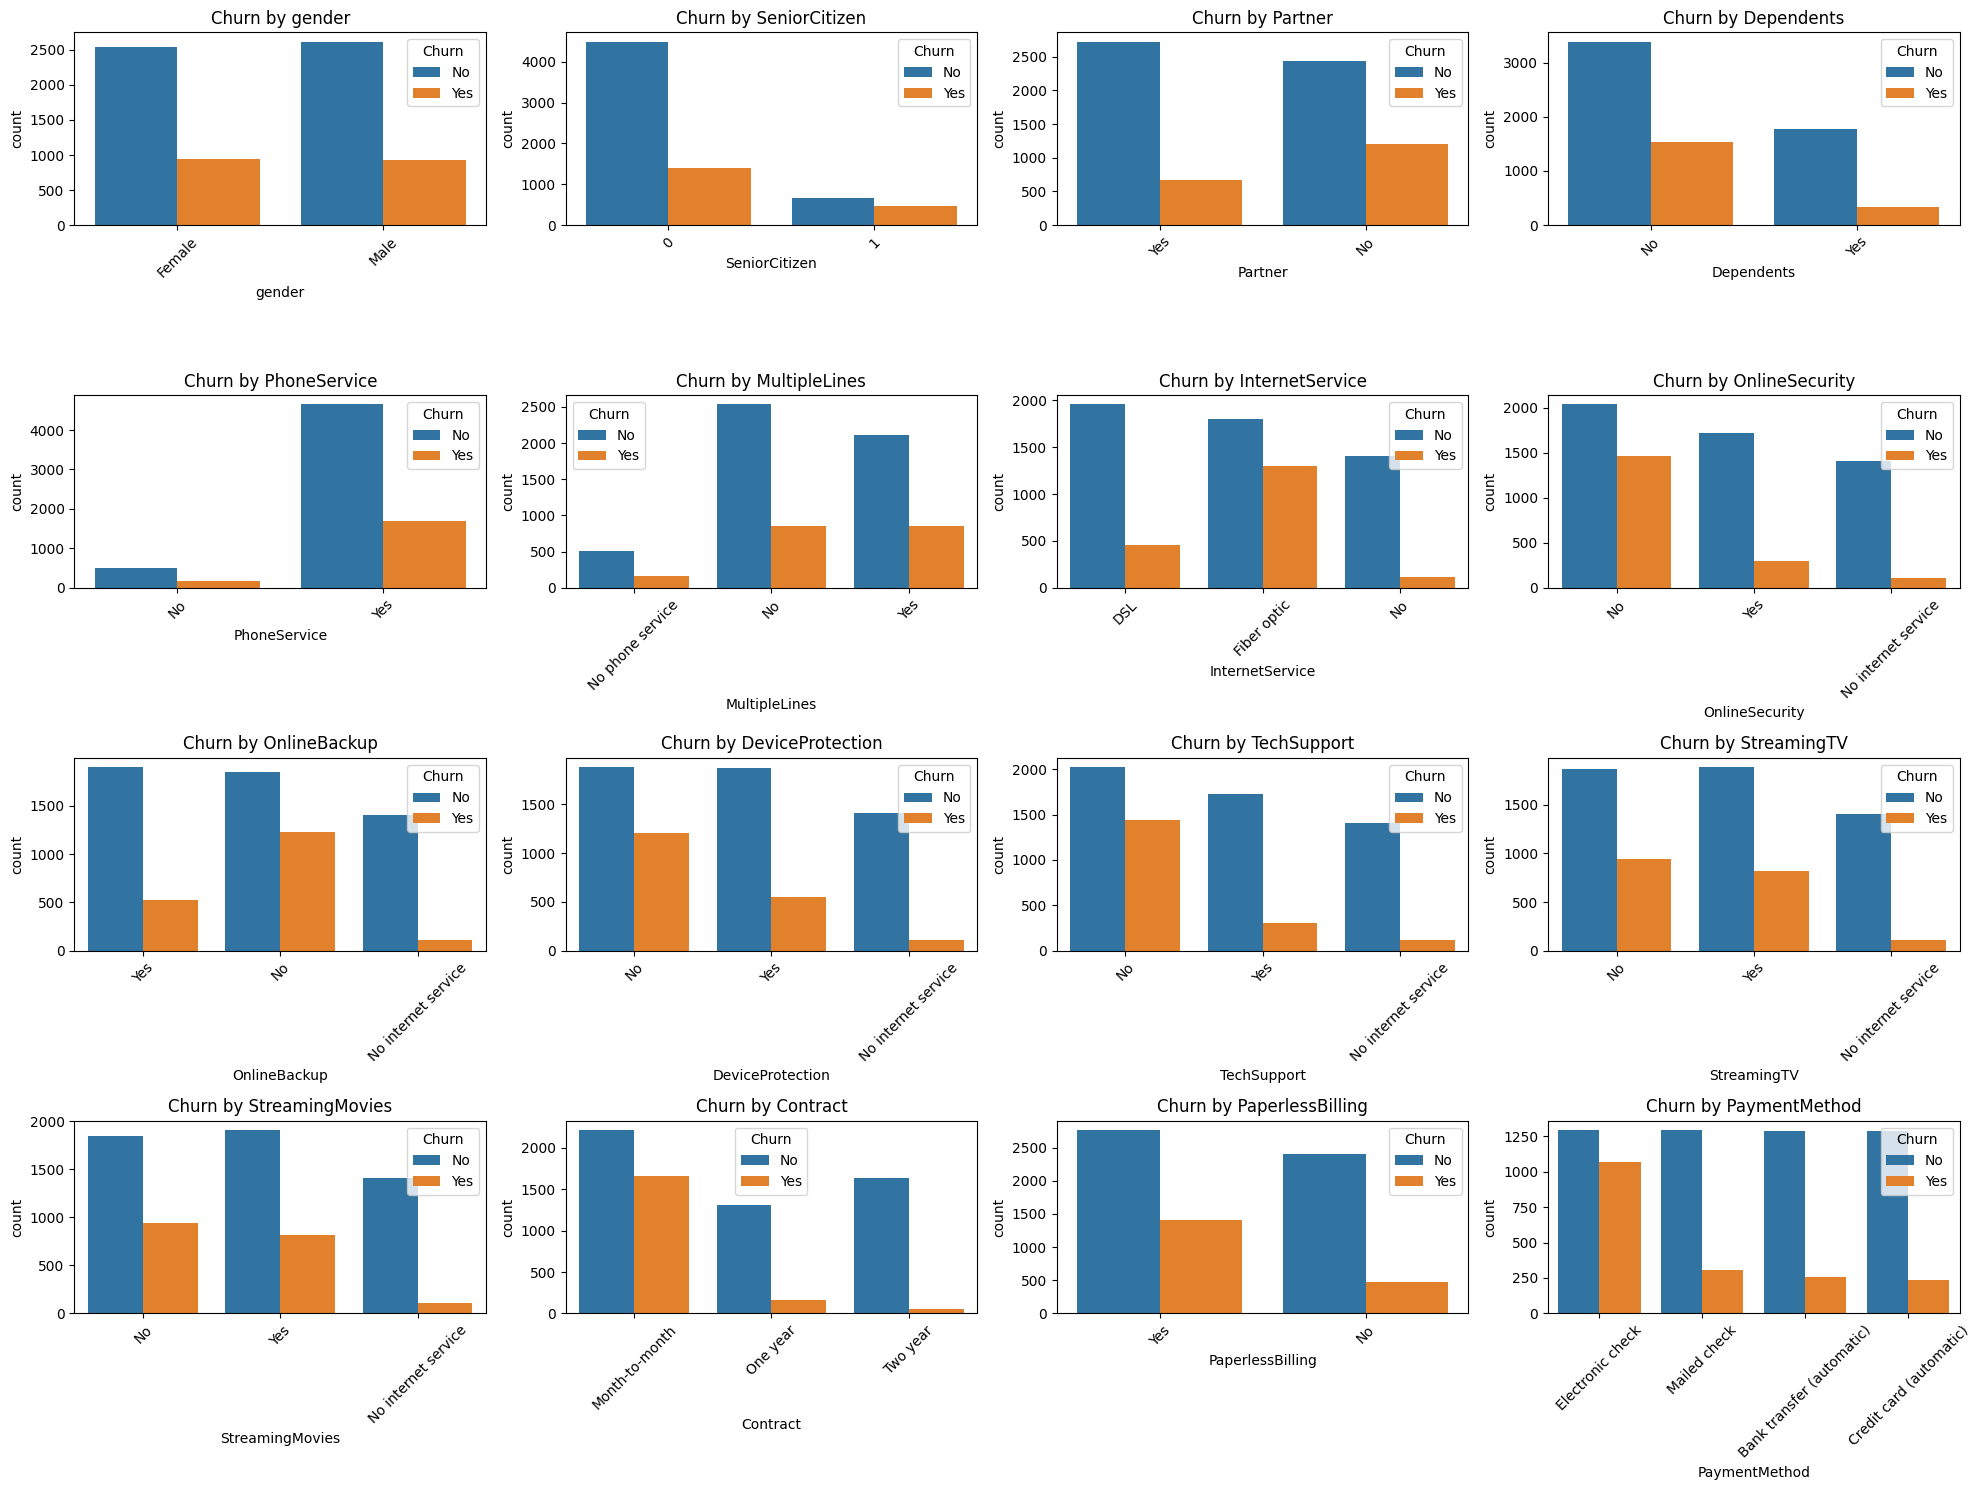

In [13]:
# Lista de variables categóricas
categorical_features = [
    'gender','SeniorCitizen','Partner','Dependents',
    'PhoneService','MultipleLines','InternetService',
    'OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaperlessBilling','PaymentMethod'
]

#Definir cantidad de filas y columnas para la grilla
n_cols = 4
n_rows = (len(categorical_features) + n_cols - 1) // n_cols  #redondeo hacia arriba

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  #pasar de matriz a vector para iterar fácil

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f"Churn by {feature}")
    axes[i].tick_params(axis='x', rotation=45)

#Eliminar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


👉 Comentarios sobre factores influyentes en la tasa de abandono:

**Pregunta 2**. Dependents - Tipo de contrato (Contract) - Método de pago (PaymentMethod) - Grupo etario (SeniorCitizen) - Servicios adicionales.

Algunas tendencias que podemos inferir:

.Month-to-month contracts → tasas de abandono mayores

.Electronic check payment → tasas de abandono elevadas

.senior citizen - mayor probabilidad de abandono

👉 Clientes que adquieren servicios adicionales:

**Pregunta 3.** Customers with extra services (Online security, Tech support, Online backup) tienden a abandonar menos.

**Churn by Numerical Features**

In [14]:
num_features = ['tenure','MonthlyCharges','TotalCharges']

for feature in num_features:
    print(f"\nAverage {feature} by churn: ")
    print(df.groupby('Churn')[feature].mean())


Average tenure by churn: 
Churn
No     37.650010
Yes    17.979133
Name: tenure, dtype: float64

Average MonthlyCharges by churn: 
Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

Average TotalCharges by churn: 
Churn
No     2555.344141
Yes    1531.796094
Name: TotalCharges, dtype: float64


Comments:

.tenure low for churned customer

.higher-monthly charges causes more churn

.Total charges lower - (they left earlier)

## Análisis Multivariado